In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

# Import the dataset from the downloaded kaggle's seattle-weather repository

df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [73]:
# Collect information on the dataset's structure
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [74]:
# Check the data types of the columns
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [75]:
# Check for null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
######### Exploring with graphs ############

<Axes: xlabel='weather', ylabel='Count'>

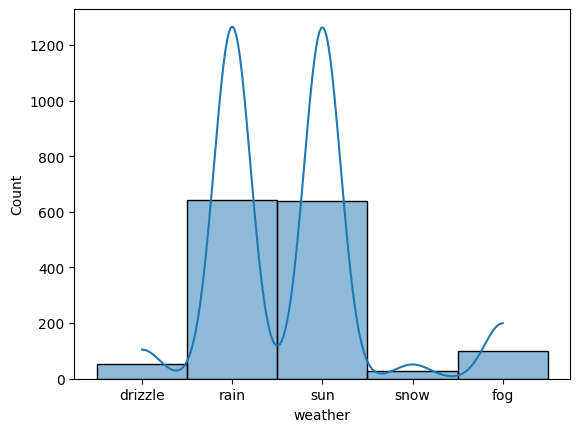

In [76]:
# Checking the distribution of weather in the whole dataset.
sns.histplot(df['weather'], bins=30, kde=True)

# Here, we may also know the different weather types to know the kind of encoding we would use for such values.

<Axes: xlabel='month', ylabel='Count'>

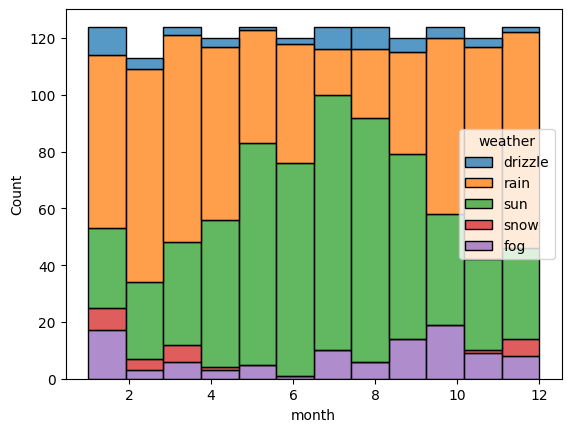

In [77]:
# Let us try to group the weather by month and see the variations and distribution of weather throughout the month.

df['month'] = pd.to_datetime(df['date']).dt.month
sns.histplot(data=df, x='month', hue='weather', multiple='stack', bins=12)

# This technique can be used to know the coldest month, the hottest month, the driest month, and the wettest month in a year. 


<Axes: xlabel='year', ylabel='Count'>

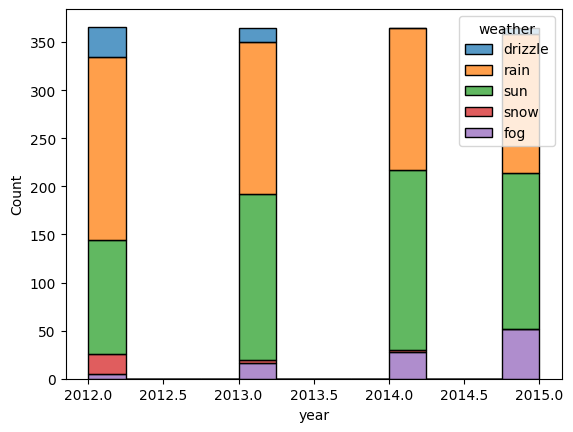

In [78]:
# We can also check the distribution of weather by year.    
df['year'] = pd.to_datetime(df['date']).dt.year
sns.histplot(data=df, x='year', hue='weather', multiple='stack', bins=12)

# This technique can be used to know the coldest year, the hottest year, the driest year, and the wettest year in a span of years. 

<Axes: xlabel='weather', ylabel='temp_max'>

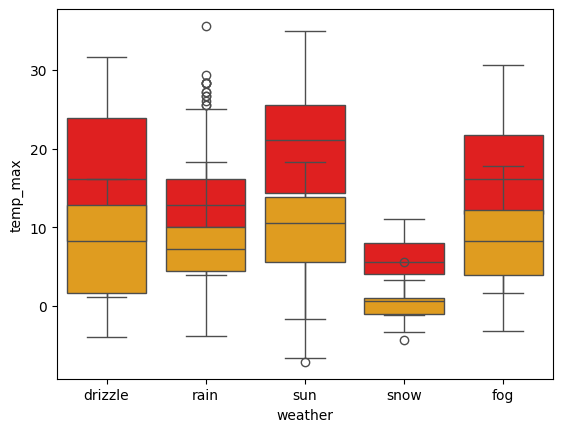

In [79]:
# Analyze the outliers 

sns.boxplot(x=df['weather'], y=df['temp_max'], color='red')
sns.boxplot(x=df['weather'], y=df['temp_min'], color='orange')

# In this example, we are trying to see the normal range of temperature for each weather type and analyze some outliers.

<Axes: xlabel='weather', ylabel='precipitation'>

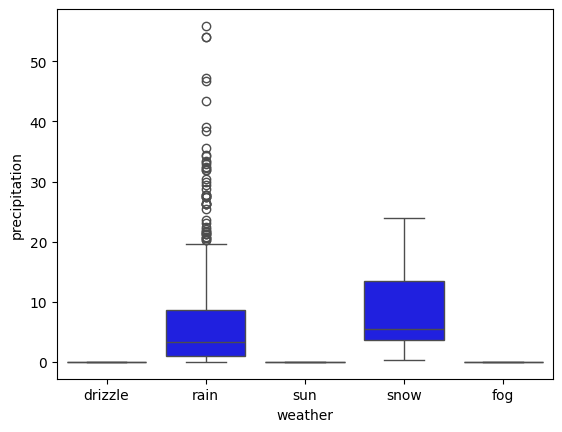

In [80]:
# Analyze the precipitation throughtout the years

sns.boxplot(x=df['weather'], y=df['precipitation'], color='blue')

# In this example, we are trying to see the normal range of precipitation for each weather type and analyze some outliers.

<Axes: xlabel='weather', ylabel='wind'>

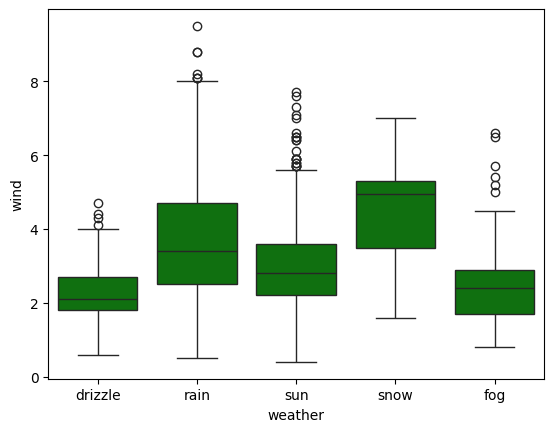

In [ ]:
# Analyze the wind speed throughtout the years
sns.boxplot(x=df['weather'], y=df['wind'], color='green')

# We can analyze the wind speed for each weather type and make some conclusions.
# For example, we can see that the wind speed is higher in the rain and snow weather types.

In [81]:
############ Now let us get to the training part ############

In [5]:
# We will first encode the weather column.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_enc'] = le.fit_transform(df['weather'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
 6   weather_enc    1461 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 80.0+ KB


In [7]:
# We will split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X = df[['temp_max', 'temp_min', 'precipitation','wind']] # or X = df.drop(['date','month','year','weather_enc','weather'], axis=1)
y = df['weather_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# We will use the Random Forest Classifier for this example.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# We will now make some predictions on the test set.
y_pred = rf.predict(X_test)

In [9]:
# See some predictions vs actual values

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head(10))

      Actual  Predicted
892        4          4
1105       2          2
413        2          4
522        4          0
1036       2          2
614        2          2
218        2          4
1160       4          4
649        2          2
887        4          4


In [10]:
# We will now check the accuracy of the model.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [11]:
# We can also check the classification report to see the precision, recall, and f1-score for each class.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

     drizzle       0.17      0.11      0.13         9
         fog       0.75      0.12      0.21        25
        rain       0.93      0.92      0.92       120
        snow       0.50      0.25      0.33         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.63      0.47      0.49       293
weighted avg       0.81      0.82      0.79       293



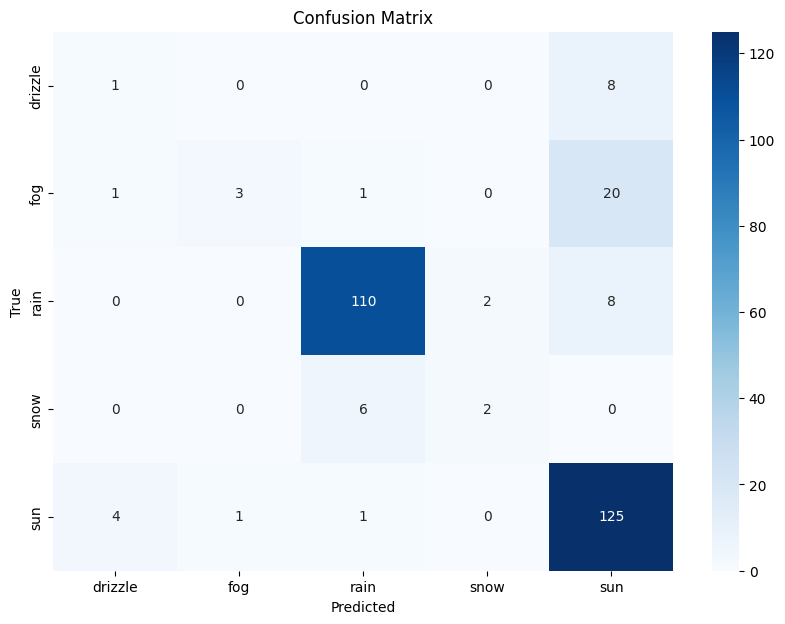

In [ ]:
# We can also check the confusion matrix to see the number of correct and incorrect predictions for each class.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Feature ranking:
1. feature 2 (0.5076335880824318)
2. feature 0 (0.19926283959884486)
3. feature 1 (0.1517462743194414)
4. feature 3 (0.14135729799928193)


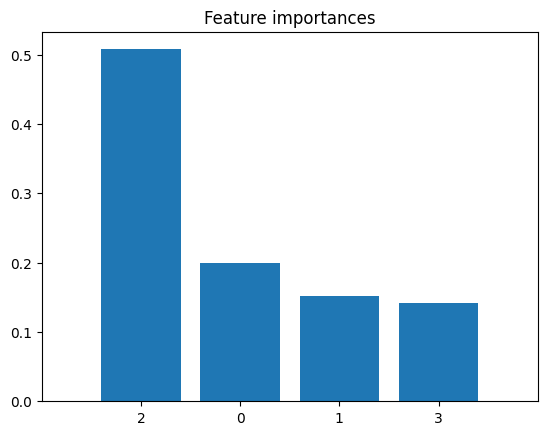

In [13]:
# We can also check the feature importance to see which features are the most important for the model.
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
df.shape

(1461, 7)